In [1]:
import spectral
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
import os
import shutil

In [2]:
import numpy as np
print(np.__version__)


1.24.1


In [2]:
# Replace 'path_to_header_file' with the path to your header file
# header_file = './data/test11/20230303/001-specim-fx10.hdr'
header_file = './data/anutest/20230419/002-specim-fx10.hdr'
# Load the ENVI dataset
image = spectral.open_image(header_file)

# Access specific bands
band_number = 11  # Change this to the desired band number
band_data = image[:, :, band_number]

# Access all bands
all_bands_data = image.load()

print(f"Band {band_number} data shape: {band_data.shape}")
print(f"All bands data shape: {all_bands_data.shape}")

Band 11 data shape: (2207, 1024, 1)
All bands data shape: (2207, 1024, 224)


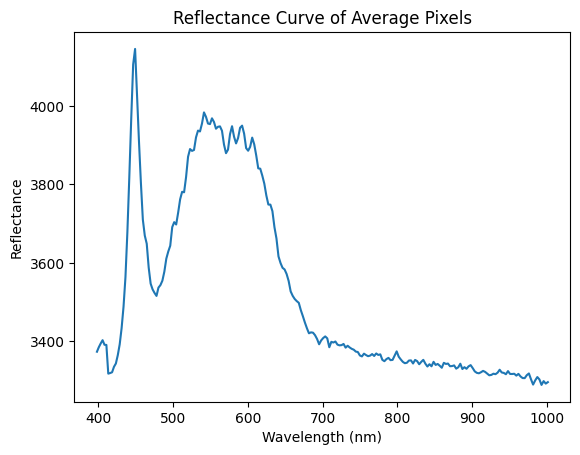

In [3]:
image_data = image.load()
mean_values = np.mean(image_data, axis=(0, 1))
wavelengths = [float(wavelength) for wavelength in image.metadata['wavelength']]
plt.plot(wavelengths, mean_values)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance')
plt.title('Reflectance Curve of Average Pixels')
# plt.grid(True)
plt.show()


In [4]:
band_np = np.array(band_data)
print(band_np.shape)

(2207, 1024, 1)


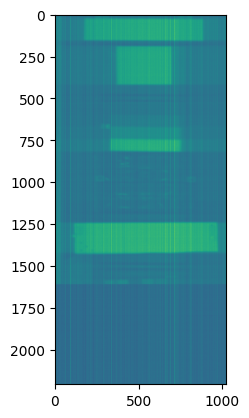

In [5]:
# band 11
plt.imshow(band_np)

In [3]:
from skimage.io import imsave

In [4]:
import os

print("Current working directory:", os.getcwd())


Current working directory: D:\Projects\AnacondaFiles\APPF_codes\CSIRO_APPF_Hyperspec\Hyp_preprocess_calib


In [6]:
def get_hyp_rgb(image, wavelengths, save_path):
    
    image = image.load()  # Convert to numpy array
    
    # # Find global minimum and maximum across all bands
    # global_min = np.min(image_array)
    # global_max = np.max(image_array)
    # Find the bands closest to red, green, and blue wavelengths
    red_band_index = find_nearest_band(wavelengths, 660)
    green_band_index = find_nearest_band(wavelengths, 550)
    blue_band_index = find_nearest_band(wavelengths, 450)
    
    
#         # Find global minimum and maximum across all bands
#     global_min = np.min(image)
#     global_max = np.max(image)
    
#     print(global_min)
#     print(global_max)

#     # Normalize the entire 3D image using the global min and max
#     image_normalized = (image - global_min) / (global_max - global_min)

#     # Extract the RGB bands from the normalized image
#     red_normalized = image_normalized[:, :, [red_band_index]]
#     green_normalized = image_normalized[:, :, [green_band_index]]
#     blue_normalized = image_normalized[:, :, [blue_band_index]]


    # Extract the RGB bands
    red_band = image[:, :, [red_band_index]]
    green_band = image[:, :, [green_band_index]]
    blue_band = image[:, :, [blue_band_index]]

    # print(red_band.min())
    # print(red_band.max())
    # Normalize the bands to the range [0, 1]
    red_normalized = (red_band - red_band.min()) / (red_band.max() - red_band.min())
    green_normalized = (green_band - green_band.min()) / (green_band.max() - green_band.min())
    blue_normalized = (blue_band - blue_band.min()) / (blue_band.max() - blue_band.min())
    
    

    # Stack the normalized bands to create an RGB image
    rgb_image = np.stack((red_normalized, green_normalized, blue_normalized), axis=-1)
    
    # rgb_image = np.stack((red_band, green_band, blue_band), axis=-1)

    # Squeeze any extra dimensions
    rgb_image_squeezed = np.squeeze(rgb_image)

    # Convert the RGB image to the range [0, 255] and save it as a PNG file
    rgb_image_uint8 = (rgb_image_squeezed * 255).astype(np.uint8)

    rgb_image_uint8 = cv2.cvtColor(rgb_image_uint8, cv2.COLOR_RGB2BGR)
    try:
        output_path =save_path[:-4]+".png"
        cv2.imwrite(output_path, rgb_image_uint8)
        print(f"Image saved as {output_path}")
    except Exception as e:
        print("Error saving the image:", e)

    # Display the RGB image
    import matplotlib.pyplot as plt

    plt.imshow(rgb_image_squeezed)
    plt.show()

In [7]:
def find_nearest_band(wavelengths, target_wavelength):
    wavelengths_float = np.array([float(w) for w in wavelengths])
    return np.argmin(np.abs(wavelengths_float - target_wavelength))

def move_files(root_path):

    all_files = os.listdir(root_path)
    
    output_folder = os.path.join(root_path, 'other_ff')
    if os.path.exists(output_folder):
        all_files.remove('other_ff')

    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for file in all_files:
        if file.endswith(".hdr") or file.endswith(".bil") or file.endswith(".png"):
            continue

        source_path = os.path.join(root_path, file)
        destination_path = os.path.join(output_folder, file)
        shutil.move(source_path, destination_path)

In [ ]:
# define source and destination directory
src_dir = "/home/appf/storage/ztest/20230713/"
dest_dir = "/home/appf/Python/data"

src_dir = r"E:/CSIRO_hyperspec/20241128"
dest_dir = r"E:/CSIRO_hyperspec/20241128"

# walk through source directory
for root, dirs, files in os.walk(src_dir):
    for file in files:
        # check if file ends with fx10.bil or fx10.hdr
        if file.endswith("fx10.bil") or file.endswith("fx10.hdr") or file.endswith("fx17.hdr") or file.endswith("fx17.hdr"):
            # construct full file path
            source_file_path = os.path.join(root, file)
            destination_file_path = os.path.join(dest_dir, file)
            # copy the file to destination directory if it doesn't exist there already
            if not os.path.exists(destination_file_path):
                shutil.copy(source_file_path, destination_file_path)
                print(f"File {file} has been copied to {dest_dir}")
            # else:
            #     print(f"File {file} already exists in the destination directory. Skipping.")
# root_path = 'D:/Projects/AnacondaFiles/APPF_codes/APPF_DATA/newhyperspec_data/'
# root_path = 'D:/Projects/AnacondaFiles/APPF_codes/APPF_DATA/4_07_23____hyperspecdata/'
# root_path = '/home/appf/storage/ztest/20230713/' 
root_path = 'E:/CSIRO_hyperspec/20241128' 
move_files(root_path)
all_files = os.listdir(root_path)
for file in all_files:
    if file.endswith(".hdr"):
        header_file = root_path+file
        if (os.path.isfile(header_file[:-4]+".png")):
            continue
        image = spectral.open_image(header_file)
        wavelengths = image.metadata['wavelength']
        get_hyp_rgb(image, wavelengths, header_file)
        
        

Image saved as E:\CSIRO_hyperspec\20241128\003-specim-fx10.png


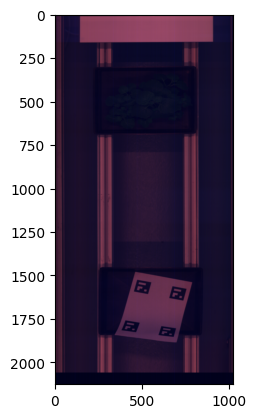

Image saved as E:\CSIRO_hyperspec\20241128\003-specim-fx17.png


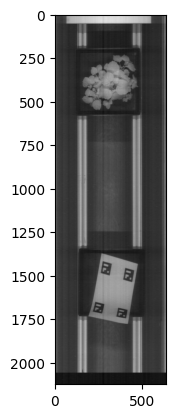

In [8]:
dest_dir = r"E:\CSIRO_hyperspec\20241128"
root_path = dest_dir
# move_files(root_path)
all_files = os.listdir(dest_dir)
for file in all_files:
    if file.endswith(".hdr"):
        header_file = os.path.join(root_path,file)
        if (os.path.isfile(header_file[:-4]+".png")):
            continue
        image = spectral.open_image(header_file)
        wavelengths = image.metadata['wavelength']
        get_hyp_rgb(image, wavelengths, header_file)

Image saved as D:\Projects\AnacondaFiles\APPF_codes\APPF_DATA\hyperspec_calib\003-specim-fx10.png


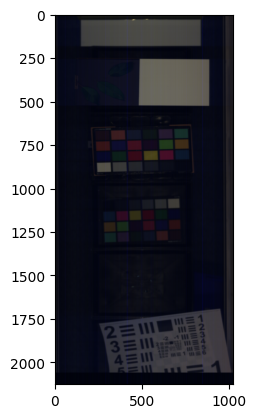

Image saved as D:\Projects\AnacondaFiles\APPF_codes\APPF_DATA\hyperspec_calib\003-specim-fx17.png


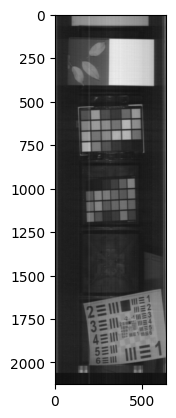

In [5]:
dest_dir = r"D:\Projects\AnacondaFiles\APPF_codes\APPF_DATA\hyperspec_calib"
root_path = dest_dir
# move_files(root_path)
all_files = os.listdir(dest_dir)
for file in all_files:
    if file.endswith(".hdr"):
        header_file = os.path.join(root_path,file)
        if (os.path.isfile(header_file[:-4]+".png")):
            continue
        image = spectral.open_image(header_file)
        wavelengths = image.metadata['wavelength']
        get_hyp_rgb(image, wavelengths, header_file)

In [6]:
import cv2
import numpy as np
import os

In [9]:
def select_coor(img, save_name):
    white_calib_coor = []
    drawing = False
    start_x, start_y = -1, -1
    img_original = img.copy()

    # Function to display the coordinates and draw rectangles
    def click_event(event, x, y, flags, params):
        nonlocal drawing, start_x, start_y, white_calib_coor, img, img_original

        if event == cv2.EVENT_LBUTTONDOWN:
            drawing = True
            start_x, start_y = x, y

        elif event == cv2.EVENT_MOUSEMOVE:
            if drawing:
                img_copy = img.copy()
                cv2.rectangle(img_copy, (start_x, start_y), (x, y), (255, 0, 0), 2)
                cv2.imshow('image', img_copy)

        elif event == cv2.EVENT_LBUTTONUP:
            drawing = False
            end_x, end_y = x, y
            cv2.rectangle(img, (start_x, start_y), (end_x, end_y), (255, 0, 0), 2)
            cv2.imshow('image', img)
            print("Start:", start_x, start_y, "End:", end_x, end_y)

            # Store all four coordinates of the selected rectangle
            top_left = (start_x, start_y)
            top_right = (end_x, start_y)
            bottom_left = (start_x, end_y)
            bottom_right = (end_x, end_y)
            white_calib_coor.append([top_left, top_right, bottom_right, bottom_left])

            # Save the selected rectangle as a separate image without the blue lines
            roi = img_original[start_y:end_y, start_x:end_x]
            cv2.imwrite('./coordinates/' + save_name+'.png', roi)

    # def update_display(*args):
    #     nonlocal img, img_original
    #     x_offset = cv2.getTrackbarPos('Horizontal', 'image')
    #     y_offset = cv2.getTrackbarPos('Vertical', 'image')
    #     img = img_original[y_offset:y_offset + window_height, x_offset:x_offset + window_width]
    #     cv2.imshow('image', img)

    window_width, window_height = 800, 600
    cv2.namedWindow('image', cv2.WINDOW_NORMAL)
    cv2.resizeWindow('image', window_width, window_height)

    # img_height, img_width, _ = img_original.shape
    # cv2.createTrackbar('Horizontal', 'image', 0, img_width - window_width, update_display)
    # cv2.createTrackbar('Vertical', 'image', 0, img_height - window_height, update_display)

    # Displaying the image
    cv2.imshow('image', img)

    # Setting mouse handler for the image and calling the click_event() function
    cv2.setMouseCallback('image', click_event)

    # Wait for a key to be pressed to exit
    cv2.waitKey(0)

    # Close the window
    cv2.destroyAllWindows()

    print(white_calib_coor)
    # os.makedirs('./data/coordinates_test', exist_ok=True)
    # Derive the save path from the img_path
    save_path = os.path.splitext(img_path)[0]+'_'+save_name + '.npy'
    
    with open(save_path, 'wb') as f:
        np.save(f, white_calib_coor)

    print(f"Coordinates saved to: {save_path}")


In [13]:
# Reading the image
img_path = r'D:\Projects\AnacondaFiles\APPF_codes\APPF_DATA\hyperspec_calib\003-specim-fx10.png'
img = cv2.imread(img_path, 1)
select_coor(img, 'white_calib')


Start: 151 43 End: 833 167
[[(151, 43), (833, 43), (833, 167), (151, 167)]]
Coordinates saved to: D:\Projects\AnacondaFiles\APPF_codes\APPF_DATA\hyperspec_calib\003-specim-fx10_white_calib.npy


In [ ]:
# the array is saved in the file geekfile.npy 
dc = np.load(r'D:\Projects\AnacondaFiles\APPF_codes\APPF_DATA\hyperspec_calib\003-specim-fx10_dark_calib.npy')
print(dc)

# the array is saved in the file geekfile.npy 
wc = np.load(r'D:\Projects\AnacondaFiles\APPF_codes\APPF_DATA\hyperspec_calib\003-specim-fx10_white_calib.npy')
print(wc)

In [23]:
def get_rois():
    # Loading the saved dark calibration and white calibration coordinates
    dc = np.load(r'D:\Projects\AnacondaFiles\APPF_codes\APPF_DATA\hyperspec_calib\003-specim-fx10_dark_calib.npy')
    wc = np.load(r'D:\Projects\AnacondaFiles\APPF_codes\APPF_DATA\hyperspec_calib\003-specim-fx10_white_calib.npy')

    # Constructing the new, larger rectangle
    big_rect = np.array([[
        [wc[0][0][0], wc[0][0][1]],    # Top-left corner
        [wc[0][1][0], wc[0][1][1]],    # Top-right corner
        [wc[0][3][0], dc[0][3][1]],     # Bottom-left corner
        [wc[0][2][0], dc[0][3][1]]    # Bottom-right corner
    ]])
    

#     # print(big_rect)


#     # Reading the image
#     img_path = r'D:\Projects\AnacondaFiles\APPF_codes\APPF_DATA\hyperspec_calib\003-specim-fx10.png'
#     img = cv2.imread(img_path, 1)

#     # Cropping the image
#     top_left = big_rect[0][0]
#     bottom_right = big_rect[0][3]
#     cropped_img = img[top_left[1]:bottom_right[1], top_left[0]:bottom_right[0]]


#     # Deriving the save_path from img_path
#     save_path = img_path.replace(".png", "_crop.png")

#     # Saving the cropped image to the derived save_path
#     cv2.imwrite(save_path, cropped_img)

    return dc, wc, big_rect

In [22]:
dest_dir = r"D:\Projects\AnacondaFiles\APPF_codes\APPF_DATA\hyperspec_calib"
root_path = dest_dir
# move_files(root_path)
all_files = os.listdir(dest_dir)
for file in all_files:
    if file.endswith("fx10.hdr"):
        header_file = os.path.join(root_path,file)
        print(header_file)
        image = spectral.open_image(header_file)
        print(np.shape(image))
        dc, wc, big_rect = get_rois()

D:\Projects\AnacondaFiles\APPF_codes\APPF_DATA\hyperspec_calib\003-specim-fx10.hdr
(2127, 1024, 224)


In [4]:
img = cv2.imread('./data/anutest/20230419/004-specim-fx10.png', 1)
cv2.namedWindow('finalImg', cv2.WINDOW_NORMAL)
cv2.imshow("finalImg",img)
cv2.waitKey(0)
#     close the window
cv2.destroyAllWindows()

In [34]:
# the array is saved in the file geekfile.npy 
b = np.load('./coordinates/fx_10_white_calib.npy')
print(b)

[[[180  40]
  [874  40]
  [874 162]
  [180 162]]]


In [38]:
b

array([[[180,  40],
        [874,  40],
        [874, 162],
        [180, 162]]])

In [39]:
def rect_area(b):
    # Compute the length of one side of the rectangle
    side1 = np.linalg.norm(b[0][0] - b[0][1])

    # Compute the length of the other side of the rectangle
    side2 = np.linalg.norm(b[0][1] - b[0][2])

    # Compute the area of the rectangle
    area = side1 * side2
    return area

In [47]:
root_path = './coordinates/'
all_files = os.listdir(root_path)
all_cord = []
for file in all_files:
    if file.endswith(".npy"):
        file_path = root_path+file
        print(file[:-4])
        b = np.load(file_path)
        all_cord.append(b)
        print(b)
        print('Area:', rect_area(b))
        print() 

fx_10_calib_dark
[[[ 180 2004]
  [ 873 2004]
  [ 873 2188]
  [ 180 2188]]]
Area: 127512.0

fx_10_calib_white
[[[180  40]
  [874  40]
  [874 162]
  [180 162]]]
Area: 84668.0

fx_10_tray1
[[[207 188]
  [817 188]
  [817 603]
  [207 603]]]
Area: 253150.0

fx_10_tray2
[[[ 209  610]
  [ 787  610]
  [ 787 1022]
  [ 209 1022]]]
Area: 238136.0

fx_10_tray3
[[[ 219 1018]
  [ 797 1018]
  [ 797 1456]
  [ 219 1456]]]
Area: 253164.0

fx_10_tray4
[[[ 219 1456]
  [ 823 1456]
  [ 823 1923]
  [ 219 1923]]]
Area: 282068.0

fx_10_tray5
[[[ 224 1916]
  [ 827 1916]
  [ 827 2088]
  [ 224 2088]]]
Area: 103716.0



In [56]:
np.array(all_cord)[5]

array([[[ 219, 1456],
        [ 823, 1456],
        [ 823, 1923],
        [ 219, 1923]]])

In [36]:
b = np.load('./coordinates/fx_10_tray1.npy')
print(b)

[[[207 188]
  [817 188]
  [817 603]
  [207 603]]]


In [ ]:
xDiff = abs(x1 - x2) # Using absolute value to ignore negatives
yDiff = abs(y1 - y2)

area = xDiff * yDiff

In [ ]:
# Calibrating the data
white_hdr_file = 'path/to/your/white_reference.hdr'
dark_hdr_file = 'path/to/your/dark_reference.hdr'
raw_hdr_file = 'path/to/your/raw_data.hdr'

white_data = spectral.open_image(white_hdr_file)
dark_data = spectral.open_image(dark_hdr_file)
raw_data = spectral.open_image(raw_hdr_file)

white_array = np.array(white_data.load())
dark_array = np.array(dark_data.load())
raw_array = np.array(raw_data.load())

# Subtract the dark reference from the raw and white reference data
raw_minus_dark = raw_array - dark_array
white_minus_dark = white_array - dark_array

# Perform element-wise division to calibrate the data
calibrated_data = raw_minus_dark / white_minus_dark

In [65]:
import spectral
import numpy as np

In [66]:


# Load the header file
header_file = './data/anutest/20230419/002-specim-fx10.hdr'
image = spectral.open_image(header_file)

# Read image data as an array
image_data = image.load()

# Normalize image data to [0, 1]
min_value = np.min(image_data)
max_value = np.max(image_data)
normalized_image_data = (image_data - min_value) / (max_value - min_value)

# Create a new Spectral image object with the normalized data
normalized_image = spectral.Image(data=normalized_image_data, metadata=image.metadata)


AttributeError: module 'spectral' has no attribute 'Image'

In [72]:



from scipy.ndimage import median_filter



Image saved as ./data/anutest/20230419/004-specim-fx10-calib.png


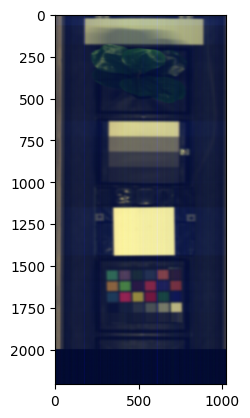

In [73]:
# Load the header file
header_file = './data/anutest/20230419/004-specim-fx10.hdr'
image = spectral.open_image(header_file)

# Read image data as an array
image_data = image.load()

# Normalize image data to [0, 1]
min_value = np.min(image_data)
max_value = np.max(image_data)
normalized_image_data = (image_data - min_value) / (max_value - min_value)
filtered_image_data = median_filter(normalized_image_data, size=(3, 3, 1))
# Continue working with the normalized_image_data NumPy array
wavelengths = image.metadata['wavelength']
get_hyp_rgb(filtered_image_data, wavelengths, header_file[:-4]+'-calib----')

In [1]:
import spectral
import numpy as np
from skimage.restoration import denoise_nl_means

# Load the header file
header_file = './data/anutest/20230419/004-specim-fx10.hdr'
image = spectral.open_image(header_file)

# Read image data as an array
image_data = image.load()

# Prepare an empty array for the denoised image data
denoised_image_data = np.empty_like(image_data)

# Apply NL-means denoising to each band in the image
for band in range(image_data.shape[2]):
    denoised_image_data[:, :, band] = denoise_nl_means(image_data[:, :, band], fast_mode=True)

# Continue working with the denoised_image_data NumPy array
wavelengths = image.metadata['wavelength']
get_hyp_rgb(filtered_image_data, wavelengths, header_file[:-4]+'-calib----')

ValueError: could not broadcast input array from shape (2206,1024) into shape (2206,1024,1)